In [323]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import math

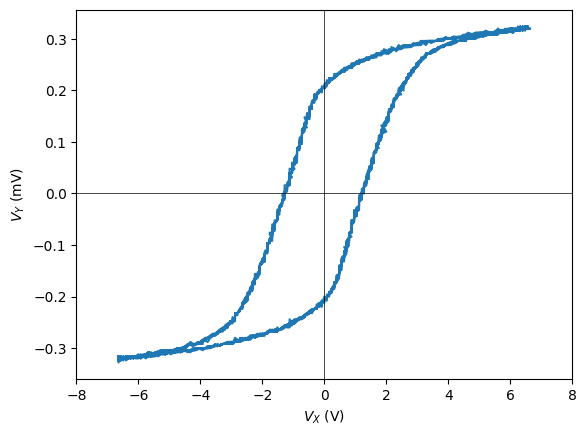

In [324]:
df = pd.read_csv('hysteresis.csv')
df.columns = ['A','B','C','D','E','F','G','H','I','J','K','L']

plt.xlabel('$V_X$ (V)')
plt.ylabel('$V_Y$ (mV)')
plt.plot(df['E'],df['K'])

plt.xlim(-8,8)
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)
plt.savefig("loop1.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

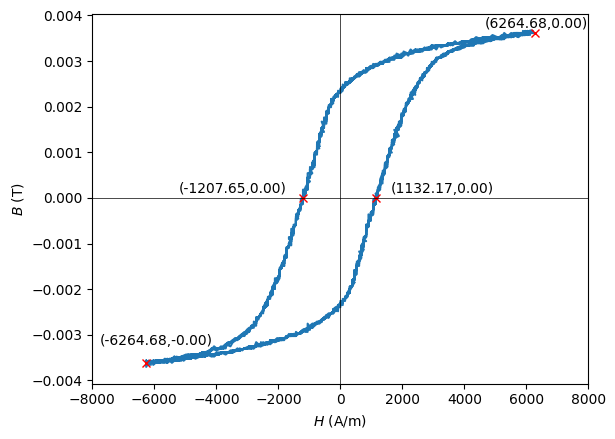

In [325]:
df = pd.read_csv('hysteresis.csv')
df.columns = ['A','B','C','D','E','F','G','H','I','J','K','L']

plt.xlabel('$H$ (A/m)')
plt.ylabel('$B$ (T)')
df['E'] = df['E'] * (584)/(2*math.pi * 0.05 * 1.9703)
df['K'] = df['K'] * (21892*9.9741*10**(-6))/(773*0.025)

plt.plot(df['E'],df['K'])
SATPTMIN = [min(df['E']),df[df['E']==df['E'].min()]['K'].values[0]]
SATPTMAX = [max(df['E']),df[df['E']==df['E'].max()]['K'].values[0]]

df1 = df.loc[df['E'] < 0]
df2 = df.loc[df['E'] > 0]

REM1 = [df1.loc[df1['K']==0]['E'].min(),0]
REM2 = [df2.loc[df2['K']==0]['E'].min(),0]

plt.plot(SATPTMIN[0],SATPTMIN[1],marker='x',color='r')
plt.annotate(f'({SATPTMIN[0]:.2f},{SATPTMIN[1]:.2f})',xy=(SATPTMIN[0],SATPTMIN[1]),
xytext=(SATPTMIN[0]-1500,SATPTMIN[1]+0.0004))

plt.plot(SATPTMAX[0],SATPTMAX[1],marker='x',color='r')
plt.annotate(f'({SATPTMAX[0]:.2f},{SATPTMAX[1]:.2f})',xy=(SATPTMAX[0],SATPTMAX[1]),
xytext=(SATPTMAX[0]-1600,SATPTMAX[1]+0.0001))

plt.plot(REM1[0],REM1[1],marker='x',color='r')
plt.annotate(f'({REM1[0]:.2f},{REM1[1]:.2f})',xy=(REM1[0],REM1[1]),
xytext=(REM1[0]-4000,REM1[1]+0.0001))

plt.plot(REM2[0],REM2[1],marker='x',color='r')
plt.annotate(f'({REM2[0]:.2f},{REM2[1]:.2f})',xy=(REM2[0],REM2[1]),
xytext=(REM2[0]+500,REM2[1]+0.0001))

plt.xlim(-8000,8000)
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)
plt.savefig("loop2.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

Top trace - Trapezoidal: 0.492320, Simpson: 0.451467
Bottom trace - Trapezoidal: 0.502080, Simpson: 0.513973
Total area - Trapezoidal: -0.009760, Simpson: -0.062507


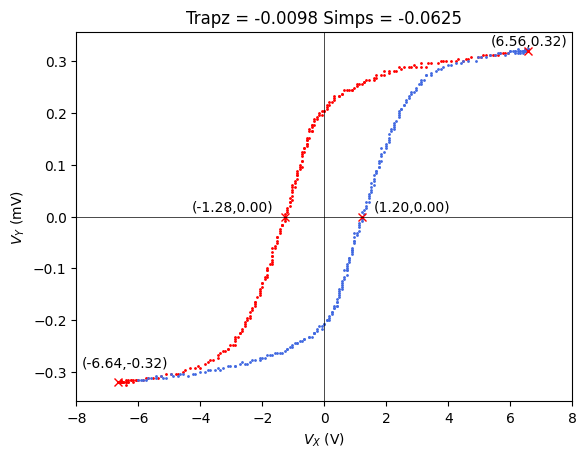

In [326]:
#0_500
df = pd.read_csv('hysteresis.csv')
df.columns = ['A','B','C','D','E','F','G','H','I','J','K','L']
df = df.iloc[0:500]

plt.xlabel('$V_X$ (V)')
plt.ylabel('$V_Y$ (mV)')
SATPTMIN = [min(df['E']),df[df['E']==df['E'].min()]['K'].values[0]]
SATPTMAX = [max(df['E']),df[df['E']==df['E'].max()]['K'].values[0]]

df1 = df.loc[df['E'] < 0]
df2 = df.loc[df['E'] > 0]

df3 = pd.concat([df.iloc[0:125],df.iloc[375:500]])
df4 = df.iloc[125:375]

plt.plot(df3['E'],df3['K'],marker='o',markersize='1',linestyle='',color='r')
plt.plot(df4['E'],df4['K'],marker='o',markersize='1',linestyle='',color='royalblue')

REM1 = [df1.loc[df1['K']==0]['E'].min(),0]
REM2 = [df2.loc[df2['K']==0]['E'].min(),0]

plt.plot(SATPTMIN[0],SATPTMIN[1],marker='x',color='r')
plt.annotate(f'({SATPTMIN[0]:.2f},{SATPTMIN[1]:.2f})',xy=(SATPTMIN[0],SATPTMIN[1]),
xytext=(SATPTMIN[0]-1.2,SATPTMIN[1]+0.03))

plt.plot(SATPTMAX[0],SATPTMAX[1],marker='x',color='r')
plt.annotate(f'({SATPTMAX[0]:.2f},{SATPTMAX[1]:.2f})',xy=(SATPTMAX[0],SATPTMAX[1]),
xytext=(SATPTMAX[0]-1.2,SATPTMAX[1]+0.01))

plt.plot(REM1[0],REM1[1],marker='x',color='r')
plt.annotate(f'({REM1[0]:.2f},{REM1[1]:.2f})',xy=(REM1[0],REM1[1]),
xytext=(REM1[0]-3,REM1[1]+0.01))

plt.plot(REM2[0],REM2[1],marker='x',color='r')
plt.annotate(f'({REM2[0]:.2f},{REM2[1]:.2f})',xy=(REM2[0],REM2[1]),
xytext=(REM2[0]+0.4,REM2[1]+0.01))

plt.xlim(-8,8)
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)

df3_sorted = df3.sort_values('E')
df4_sorted = df4.sort_values('E')

# Calculate areas
TRAP1 = abs(sp.integrate.trapezoid(df3_sorted['K'], x=df3_sorted['E']))
SIMP1 = abs(sp.integrate.simpson(df3_sorted['K'], x=df3_sorted['E']))

TRAP2 = abs(sp.integrate.trapezoid(df4_sorted['K'], x=df4_sorted['E']))
SIMP2 = abs(sp.integrate.simpson(df4_sorted['K'], x=df4_sorted['E']))

print(f"Top trace - Trapezoidal: {TRAP1:.6f}, Simpson: {SIMP1:.6f}")
print(f"Bottom trace - Trapezoidal: {TRAP2:.6f}, Simpson: {SIMP2:.6f}")

total_area_trap = TRAP1 - TRAP2
total_area_simp = SIMP1 - SIMP2
print(f"Total area - Trapezoidal: {total_area_trap:.6f}, Simpson: {total_area_simp:.6f}")
plt.title(f'Trapz = {total_area_trap:.4f} Simps = {total_area_simp:.4f}')
plt.savefig("loop3.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

Top trace - Trapezoidal: 0.489280, Simpson: 0.484400
Bottom trace - Trapezoidal: 0.505440, Simpson: 0.458773
Total area - Trapezoidal: -0.016160, Simpson: 0.025627


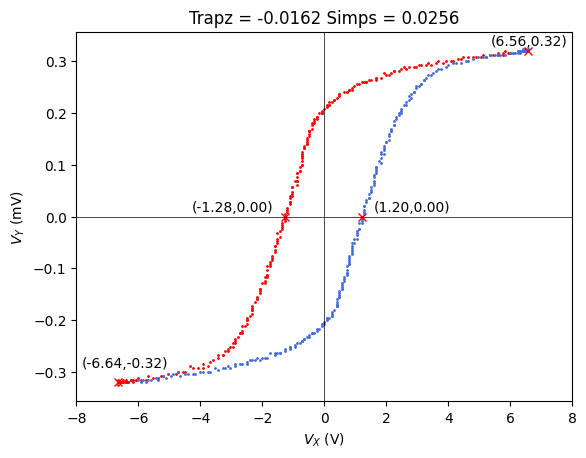

In [327]:
#500_1000
df = pd.read_csv('hysteresis.csv')
df.columns = ['A','B','C','D','E','F','G','H','I','J','K','L']
df = df.iloc[500:1000]

plt.xlabel('$V_X$ (V)')
plt.ylabel('$V_Y$ (mV)')
SATPTMIN = [min(df['E']),df[df['E']==df['E'].min()]['K'].values[0]]
SATPTMAX = [max(df['E']),df[df['E']==df['E'].max()]['K'].values[0]]

df1 = df.loc[df['E'] < 0]
df2 = df.loc[df['E'] > 0]

df3 = pd.concat([df.iloc[0:125],df.iloc[375:500]])
df4 = df.iloc[125:375]

plt.plot(df3['E'],df3['K'],marker='o',markersize='1',linestyle='',color='r')
plt.plot(df4['E'],df4['K'],marker='o',markersize='1',linestyle='',color='royalblue')

REM1 = [df1.loc[df1['K']==0]['E'].min(),0]
REM2 = [df2.loc[df2['K']==0]['E'].min(),0]

plt.plot(SATPTMIN[0],SATPTMIN[1],marker='x',color='r')
plt.annotate(f'({SATPTMIN[0]:.2f},{SATPTMIN[1]:.2f})',xy=(SATPTMIN[0],SATPTMIN[1]),
xytext=(SATPTMIN[0]-1.2,SATPTMIN[1]+0.03))

plt.plot(SATPTMAX[0],SATPTMAX[1],marker='x',color='r')
plt.annotate(f'({SATPTMAX[0]:.2f},{SATPTMAX[1]:.2f})',xy=(SATPTMAX[0],SATPTMAX[1]),
xytext=(SATPTMAX[0]-1.2,SATPTMAX[1]+0.01))

plt.plot(REM1[0],REM1[1],marker='x',color='r')
plt.annotate(f'({REM1[0]:.2f},{REM1[1]:.2f})',xy=(REM1[0],REM1[1]),
xytext=(REM1[0]-3,REM1[1]+0.01))

plt.plot(REM2[0],REM2[1],marker='x',color='r')
plt.annotate(f'({REM2[0]:.2f},{REM2[1]:.2f})',xy=(REM2[0],REM2[1]),
xytext=(REM2[0]+0.4,REM2[1]+0.01))

plt.xlim(-8,8)
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)

df3_sorted = df3.sort_values('E')
df4_sorted = df4.sort_values('E')

# Calculate areas
TRAP1 = abs(sp.integrate.trapezoid(df3_sorted['K'], x=df3_sorted['E']))
SIMP1 = abs(sp.integrate.simpson(df3_sorted['K'], x=df3_sorted['E']))

TRAP2 = abs(sp.integrate.trapezoid(df4_sorted['K'], x=df4_sorted['E']))
SIMP2 = abs(sp.integrate.simpson(df4_sorted['K'], x=df4_sorted['E']))

print(f"Top trace - Trapezoidal: {TRAP1:.6f}, Simpson: {SIMP1:.6f}")
print(f"Bottom trace - Trapezoidal: {TRAP2:.6f}, Simpson: {SIMP2:.6f}")

total_area_trap = TRAP1 - TRAP2
total_area_simp = SIMP1 - SIMP2
print(f"Total area - Trapezoidal: {total_area_trap:.6f}, Simpson: {total_area_simp:.6f}")
plt.title(f'Trapz = {total_area_trap:.4f} Simps = {total_area_simp:.4f}')
plt.savefig("loop4.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

Top trace - Trapezoidal: 0.493120, Simpson: 0.467867
Bottom trace - Trapezoidal: 0.488000, Simpson: 0.502862
Total area - Trapezoidal: 0.005120, Simpson: -0.034996


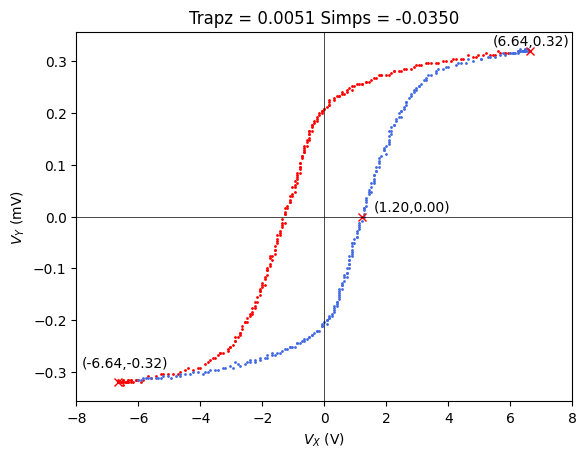

In [328]:
#1000_1500
df = pd.read_csv('hysteresis.csv')
df.columns = ['A','B','C','D','E','F','G','H','I','J','K','L']
df = df.iloc[1000:1500]

plt.xlabel('$V_X$ (V)')
plt.ylabel('$V_Y$ (mV)')
SATPTMIN = [min(df['E']),df[df['E']==df['E'].min()]['K'].values[0]]
SATPTMAX = [max(df['E']),df[df['E']==df['E'].max()]['K'].values[0]]

df1 = df.loc[df['E'] < 0]
df2 = df.loc[df['E'] > 0]

df3 = pd.concat([df.iloc[0:125],df.iloc[375:500]])
df4 = df.iloc[125:375]

plt.plot(df3['E'],df3['K'],marker='o',markersize='1',linestyle='',color='r')
plt.plot(df4['E'],df4['K'],marker='o',markersize='1',linestyle='',color='royalblue')

REM1 = [df1.loc[df1['K']==0]['E'].min(),0]
REM2 = [df2.loc[df2['K']==0]['E'].min(),0]

plt.plot(SATPTMIN[0],SATPTMIN[1],marker='x',color='r')
plt.annotate(f'({SATPTMIN[0]:.2f},{SATPTMIN[1]:.2f})',xy=(SATPTMIN[0],SATPTMIN[1]),
xytext=(SATPTMIN[0]-1.2,SATPTMIN[1]+0.03))

plt.plot(SATPTMAX[0],SATPTMAX[1],marker='x',color='r')
plt.annotate(f'({SATPTMAX[0]:.2f},{SATPTMAX[1]:.2f})',xy=(SATPTMAX[0],SATPTMAX[1]),
xytext=(SATPTMAX[0]-1.2,SATPTMAX[1]+0.01))

plt.plot(REM1[0],REM1[1],marker='x',color='r')
plt.annotate(f'({REM1[0]:.2f},{REM1[1]:.2f})',xy=(REM1[0],REM1[1]),
xytext=(REM1[0]-3,REM1[1]+0.01))

plt.plot(REM2[0],REM2[1],marker='x',color='r')
plt.annotate(f'({REM2[0]:.2f},{REM2[1]:.2f})',xy=(REM2[0],REM2[1]),
xytext=(REM2[0]+0.4,REM2[1]+0.01))

plt.xlim(-8,8)
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)

df3_sorted = df3.sort_values('E')
df4_sorted = df4.sort_values('E')

# Calculate areas
TRAP1 = abs(sp.integrate.trapezoid(df3_sorted['K'], x=df3_sorted['E']))
SIMP1 = abs(sp.integrate.simpson(df3_sorted['K'], x=df3_sorted['E']))

TRAP2 = abs(sp.integrate.trapezoid(df4_sorted['K'], x=df4_sorted['E']))
SIMP2 = abs(sp.integrate.simpson(df4_sorted['K'], x=df4_sorted['E']))

print(f"Top trace - Trapezoidal: {TRAP1:.6f}, Simpson: {SIMP1:.6f}")
print(f"Bottom trace - Trapezoidal: {TRAP2:.6f}, Simpson: {SIMP2:.6f}")

total_area_trap = TRAP1 - TRAP2
total_area_simp = SIMP1 - SIMP2
print(f"Total area - Trapezoidal: {total_area_trap:.6f}, Simpson: {total_area_simp:.6f}")
plt.title(f'Trapz = {total_area_trap:.4f} Simps = {total_area_simp:.4f}')
plt.savefig("loop5.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

Top trace - Trapezoidal: 0.492320, Simpson: 0.470480
Bottom trace - Trapezoidal: 0.514240, Simpson: 0.539600
Total area - Trapezoidal: -0.021920, Simpson: -0.069120


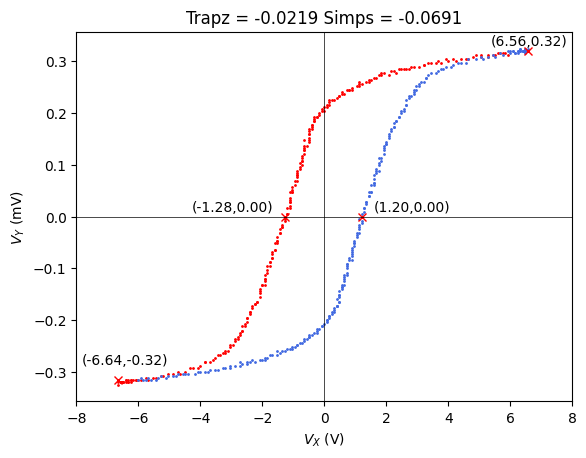

In [329]:
#1500_2000
df = pd.read_csv('hysteresis.csv')
df.columns = ['A','B','C','D','E','F','G','H','I','J','K','L']
df = df.iloc[1500:2000]

plt.xlabel('$V_X$ (V)')
plt.ylabel('$V_Y$ (mV)')
SATPTMIN = [min(df['E']),df[df['E']==df['E'].min()]['K'].values[0]]
SATPTMAX = [max(df['E']),df[df['E']==df['E'].max()]['K'].values[0]]

df1 = df.loc[df['E'] < 0]
df2 = df.loc[df['E'] > 0]

df3 = pd.concat([df.iloc[0:125],df.iloc[375:500]])
df4 = df.iloc[125:375]

plt.plot(df3['E'],df3['K'],marker='o',markersize='1',linestyle='',color='r')
plt.plot(df4['E'],df4['K'],marker='o',markersize='1',linestyle='',color='royalblue')

REM1 = [df1.loc[df1['K']==0]['E'].min(),0]
REM2 = [df2.loc[df2['K']==0]['E'].min(),0]

plt.plot(SATPTMIN[0],SATPTMIN[1],marker='x',color='r')
plt.annotate(f'({SATPTMIN[0]:.2f},{SATPTMIN[1]:.2f})',xy=(SATPTMIN[0],SATPTMIN[1]),
xytext=(SATPTMIN[0]-1.2,SATPTMIN[1]+0.03))

plt.plot(SATPTMAX[0],SATPTMAX[1],marker='x',color='r')
plt.annotate(f'({SATPTMAX[0]:.2f},{SATPTMAX[1]:.2f})',xy=(SATPTMAX[0],SATPTMAX[1]),
xytext=(SATPTMAX[0]-1.2,SATPTMAX[1]+0.01))

plt.plot(REM1[0],REM1[1],marker='x',color='r')
plt.annotate(f'({REM1[0]:.2f},{REM1[1]:.2f})',xy=(REM1[0],REM1[1]),
xytext=(REM1[0]-3,REM1[1]+0.01))

plt.plot(REM2[0],REM2[1],marker='x',color='r')
plt.annotate(f'({REM2[0]:.2f},{REM2[1]:.2f})',xy=(REM2[0],REM2[1]),
xytext=(REM2[0]+0.4,REM2[1]+0.01))

plt.xlim(-8,8)
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)

df3_sorted = df3.sort_values('E')
df4_sorted = df4.sort_values('E')

# Calculate areas
TRAP1 = abs(sp.integrate.trapezoid(df3_sorted['K'], x=df3_sorted['E']))
SIMP1 = abs(sp.integrate.simpson(df3_sorted['K'], x=df3_sorted['E']))

TRAP2 = abs(sp.integrate.trapezoid(df4_sorted['K'], x=df4_sorted['E']))
SIMP2 = abs(sp.integrate.simpson(df4_sorted['K'], x=df4_sorted['E']))

print(f"Top trace - Trapezoidal: {TRAP1:.6f}, Simpson: {SIMP1:.6f}")
print(f"Bottom trace - Trapezoidal: {TRAP2:.6f}, Simpson: {SIMP2:.6f}")

total_area_trap = TRAP1 - TRAP2
total_area_simp = SIMP1 - SIMP2
print(f"Total area - Trapezoidal: {total_area_trap:.6f}, Simpson: {total_area_simp:.6f}")
plt.title(f'Trapz = {total_area_trap:.4f} Simps = {total_area_simp:.4f}')
plt.savefig("loop6.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

Top trace - Trapezoidal: 0.495680, Simpson: 0.442933
Bottom trace - Trapezoidal: 0.515520, Simpson: 0.551342
Total area - Trapezoidal: -0.019840, Simpson: -0.108409


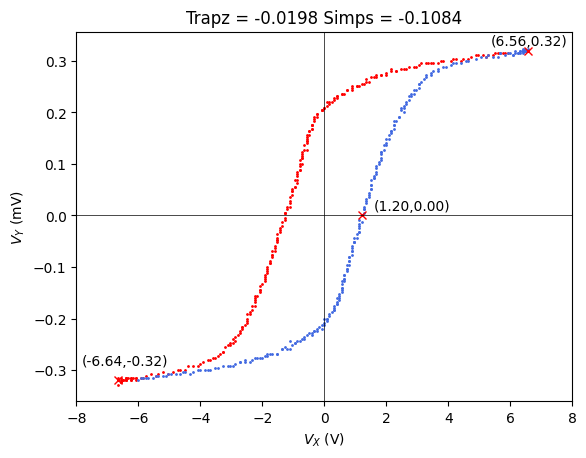

In [330]:
#2000_2500
df = pd.read_csv('hysteresis.csv')
df.columns = ['A','B','C','D','E','F','G','H','I','J','K','L']
df = df.iloc[2000:2500]

plt.xlabel('$V_X$ (V)')
plt.ylabel('$V_Y$ (mV)')
SATPTMIN = [min(df['E']),df[df['E']==df['E'].min()]['K'].values[0]]
SATPTMAX = [max(df['E']),df[df['E']==df['E'].max()]['K'].values[0]]

df1 = df.loc[df['E'] < 0]
df2 = df.loc[df['E'] > 0]

df3 = pd.concat([df.iloc[0:125],df.iloc[375:500]])
df4 = df.iloc[125:375]

plt.plot(df3['E'],df3['K'],marker='o',markersize='1',linestyle='',color='r')
plt.plot(df4['E'],df4['K'],marker='o',markersize='1',linestyle='',color='royalblue')

REM1 = [df1.loc[df1['K']==0]['E'].min(),0]
REM2 = [df2.loc[df2['K']==0]['E'].min(),0]

plt.plot(SATPTMIN[0],SATPTMIN[1],marker='x',color='r')
plt.annotate(f'({SATPTMIN[0]:.2f},{SATPTMIN[1]:.2f})',xy=(SATPTMIN[0],SATPTMIN[1]),
xytext=(SATPTMIN[0]-1.2,SATPTMIN[1]+0.03))

plt.plot(SATPTMAX[0],SATPTMAX[1],marker='x',color='r')
plt.annotate(f'({SATPTMAX[0]:.2f},{SATPTMAX[1]:.2f})',xy=(SATPTMAX[0],SATPTMAX[1]),
xytext=(SATPTMAX[0]-1.2,SATPTMAX[1]+0.01))

plt.plot(REM1[0],REM1[1],marker='x',color='r')
plt.annotate(f'({REM1[0]:.2f},{REM1[1]:.2f})',xy=(REM1[0],REM1[1]),
xytext=(REM1[0]-3,REM1[1]+0.01))

plt.plot(REM2[0],REM2[1],marker='x',color='r')
plt.annotate(f'({REM2[0]:.2f},{REM2[1]:.2f})',xy=(REM2[0],REM2[1]),
xytext=(REM2[0]+0.4,REM2[1]+0.01))

plt.xlim(-8,8)
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)

df3_sorted = df3.sort_values('E')
df4_sorted = df4.sort_values('E')

# Calculate areas
TRAP1 = abs(sp.integrate.trapezoid(df3_sorted['K'], x=df3_sorted['E']))
SIMP1 = abs(sp.integrate.simpson(df3_sorted['K'], x=df3_sorted['E']))

TRAP2 = abs(sp.integrate.trapezoid(df4_sorted['K'], x=df4_sorted['E']))
SIMP2 = abs(sp.integrate.simpson(df4_sorted['K'], x=df4_sorted['E']))

print(f"Top trace - Trapezoidal: {TRAP1:.6f}, Simpson: {SIMP1:.6f}")
print(f"Bottom trace - Trapezoidal: {TRAP2:.6f}, Simpson: {SIMP2:.6f}")

total_area_trap = TRAP1 - TRAP2
total_area_simp = SIMP1 - SIMP2
print(f"Total area - Trapezoidal: {total_area_trap:.6f}, Simpson: {total_area_simp:.6f}")
plt.title(f'Trapz = {total_area_trap:.4f} Simps = {total_area_simp:.4f}')
plt.savefig("loop7.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

Fitted parameters: L = 0.0023, k = 0.0081, x0 = 288.1456


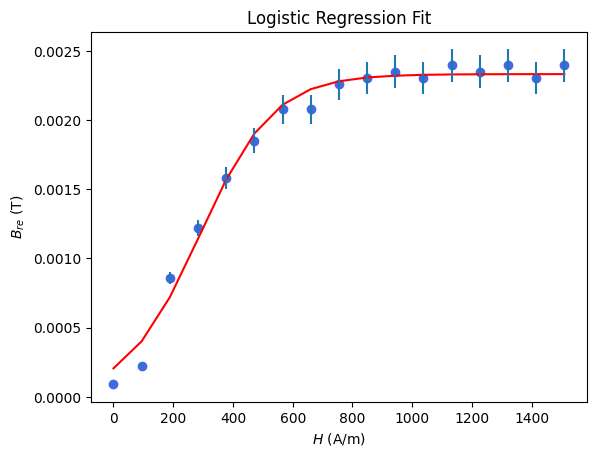

In [341]:
df00 = pd.read_csv('0A.csv')
df01 = pd.read_csv('0_1Aaa.csv')
df02 = pd.read_csv('0_2A.csv')
df03 = pd.read_csv('0_3Aaaa.csv')
df04 = pd.read_csv('0_4Aa.csv')
df05 = pd.read_csv('0_5A.csv')
df06 = pd.read_csv('0_6A.csv')
df07 = pd.read_csv('0_7A.csv')
df08 = pd.read_csv('0_8A.csv')
df09 = pd.read_csv('0_9A.csv')
df10 = pd.read_csv('1_0A.csv')
df11 = pd.read_csv('1_1A.csv')
df12 = pd.read_csv('1_2A.csv')
df13 = pd.read_csv('1_3A.csv')
df14 = pd.read_csv('1_4A.csv')
df15 = pd.read_csv('1_5A.csv')
df16 = pd.read_csv('1_6A.csv')

dflist = [df00,df01,df02,df03,df04,df05,df06,df07,df08,df09,df10,df11,df12,df13,df14,df15,df16]

for df in dflist:
    df.columns = ['A','B','C','D','E','F','G','H','I','J','K','L']

REM = []
for df in dflist:
    REM.append(df.loc[df['E']==0]['K'].max())

AMPS = [i/10 + 0.1 for i in range(-1,16)]

for i in range(len(REM)):
    REM[i] = REM[i] * (21892*9.9741*10**(-6))/(773*0.025)
for i in range(len(AMPS)):
    AMPS[i] = AMPS[i] * (584)/(2*math.pi * 0.05 * 1.9703)

def logistic(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))


def residuals(params, x, y):
    L, k, x0 = params
    return y - logistic(x, L, k, x0)

initial_guess = [0.0005, 0.01, 500] 
result = sp.optimize.least_squares(residuals, initial_guess, args=(AMPS, REM))

L_fit, k_fit, x0_fit = result.x

# Plot the results
plt.scatter(AMPS, REM,color='royalblue')
plt.plot(AMPS, logistic(AMPS, L_fit, k_fit, x0_fit), 'r-')
plt.ylabel('$B_{re}$ (T)')
plt.xlabel('$H$ (A/m)')
plt.title('Logistic Regression Fit')
plt.errorbar(AMPS,REM, yerr=[0.05*i for i in REM],linestyle='')

print(f"Fitted parameters: L = {L_fit:.4f}, k = {k_fit:.4f}, x0 = {x0_fit:.4f}")
plt.savefig("curve1.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

